<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 19.2 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision


In [ ]:
import torchvision.datasets
import torchvision.models

In [ ]:
print(torch.__version__)

2.4.1+cu121


In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [ ]:
device

device(type='cpu')

In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None,

)

100%|██████████| 26421880/26421880 [00:05<00:00, 4952276.16it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205289.12it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3739107.35it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18940593.85it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_dataset = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True,
    target_transform = None,
)

In [ ]:
len(test_dataset)

10000

In [ ]:
len(train_dataset)

60000

In [ ]:
classes = train_dataset.classes

In [ ]:
image, label = train_dataset[0]

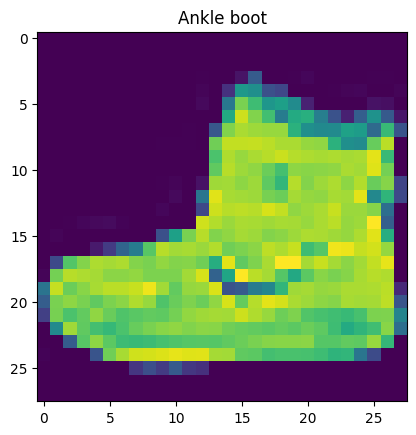

In [ ]:
plt.imshow(image.squeeze())
plt.title(classes[label]);

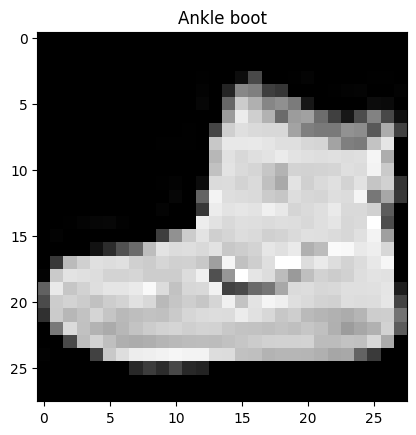

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(classes[label]);

In [ ]:
torch.randint(0,len(train_dataset),(1,))

tensor([49257])

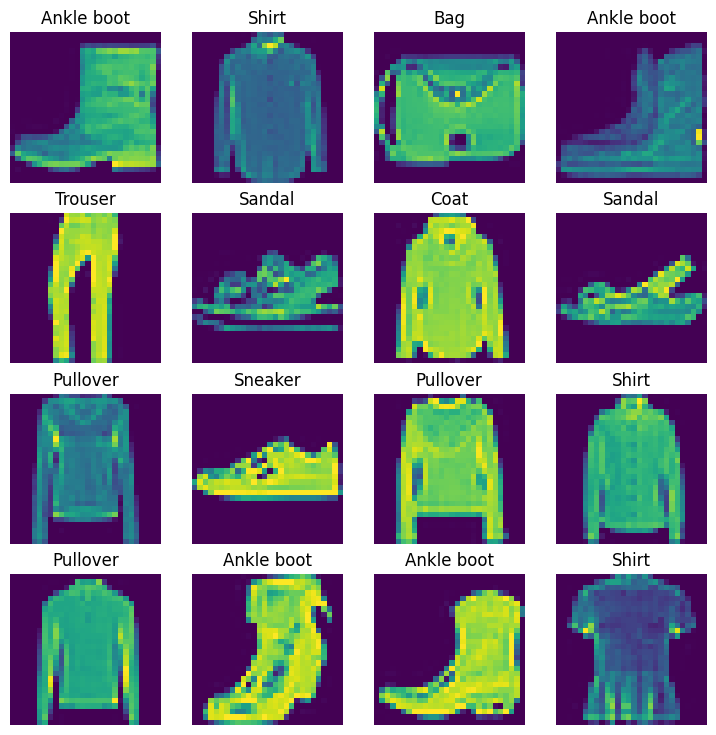

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
for i in range (1,17):
  j = torch.randint(0,len(train_dataset),size = [1]).item()
  # print(j)
  image, label = train_dataset[j]
  fig.add_subplot(4,4,i)
  plt.imshow(image.squeeze())
  plt.title(classes[label])
  plt.axis(False)
  # break

# **Preparing Data Loader**

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data = DataLoader(
    dataset = train_dataset,
    batch_size = 32,
    shuffle = True,
)

test_data = DataLoader(
    dataset = test_dataset,
    batch_size = 32,
    shuffle = False
)

In [ ]:
train_data, test_data

(<torch.utils.data.dataloader.DataLoader at 0x7d9565979150>,
 <torch.utils.data.dataloader.DataLoader at 0x7d9565979600>)

In [ ]:
len(train_data)

1875

In [ ]:
train_batch,train_label = next(iter(train_data))

In [ ]:
train_batch.shape

torch.Size([32, 1, 28, 28])

In [ ]:
train_label.shape

torch.Size([32])

In [ ]:
train_batch[0].squeeze().shape

torch.Size([28, 28])

21


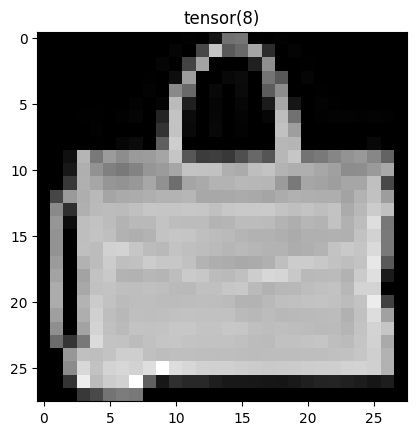

In [ ]:
# torch.manual_seed(42)
j = torch.randint(0, len(train_batch), size = [1]).item()
print(j)
plt.imshow(train_batch[j].squeeze(), cmap = 'gray');
plt.title(train_label[j]);

# **Create a model**

In [ ]:
import torch.nn as nn

In [ ]:
class FashionMNSTv1(nn.Module):
  def __init__(self, input_shape, hidden_layer, output_shape):
    super().__init__()

    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_layer),
        nn.Linear(hidden_layer, output_shape),
    )

  def forward(self,x):
    return self.stack(x)

In [ ]:
model0 = FashionMNSTv1(input_shape = (28 * 28), hidden_layer = 10,output_shape = len(classes))
model0

FashionMNSTv1(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('The helper file already exists')
else:
  helper = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")


In [ ]:
with open('/content/helper_function.py', 'wb') as f:
  f.write(helper.content)

In [ ]:
from helper_function import accuracy_fn

In [ ]:
# create loss adn accuracy
import torch.nn as nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr =0.1)

# **Creating timer to track our time**

In [ ]:
def print_time(start,end,device):
  total_time = end - start
  print(f'the time on {device} is {total_time}')
  return end-start

In [ ]:
from timeit import default_timer as time


In [ ]:
# Write the training loop
from tqdm.auto import tqdm
epochs = 3

start_timeon_cpu = time()
for epoch in tqdm(range(epochs)):
  print(f'The epoch is {epoch} ---->')

  train_loss = 0
  model0.train()
  for batch,(X,y) in enumerate(train_data):

    y_logits = model0(X)
    batch_loss = loss_fn(y_logits,y)
    train_loss += batch_loss.item()

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()
    if batch % 400 ==0:
      print(f'training for the batch {batch * len(X)}/{len(train_dataset)}')
  train_loss /= len(train_data)
  model0.eval()
  test_acc, test_loss= 0,0

  with torch.inference_mode():
    for X,y in test_data:
      y_tlogits = model0(X)
      batch_loss = loss_fn(y_tlogits, y)
      test_loss += batch_loss.item()
      accuracy = accuracy_fn(y,y_tlogits.argmax(dim = 1))
      test_acc += accuracy

  test_loss /= len(test_data)
  test_acc /= len(test_data)
  end_time_on_cpu = time()
  totaltime = print_time(start_timeon_cpu, end_time_on_cpu, 'cpu')
  # print(start_timeon_cpu)
  # print(end_time_on_cpu)
  print(f'\nthe average training loss of epoch is {train_loss} the test_loss:{test_loss}, test_accuracy:{test_acc}\n')







  0%|          | 0/3 [00:00<?, ?it/s]

The epoch is 0 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 10.679624372999996

the average training loss of epoch is 0.590876209918658 the test_loss:0.4986476888195775, test_accuracy:82.55790734824281

The epoch is 1 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 21.73295893399998

the average training loss of epoch is 0.4756894632021586 the test_loss:0.48282686309121287, test_accuracy:82.58785942492013

The epoch is 2 ---->
training for the batch 0/60000
training for the batch 12800/60000
training for the batch 25600/60000
training for the batch 38400/60000
training for the batch 51200/60000
the time on cpu is 32.89982154699999

the average training loss of epoch is 0.4527096848448118 the 

# **Non linear model**

In [ ]:
class FashionMNSTv1(nn.Module):
  def __init__(self, input_layers, hidden_layers, output_layers):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_layers, hidden_layers),
        nn.ReLU(),
        nn.Linear(hidden_layers, output_layers),
        nn.ReLU()
    )

  def forward(self, x):
    return self.stack(x)

In [ ]:
model1 = FashionMNSTv1((28 * 28), 10, len(classes))
model1

FashionMNSTv1(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.1)


In [ ]:
len(train_dataset)

60000

In [ ]:
def train_step(model,train_data,loss_fn, optimizer):
  train_loss = 0
  model.train()
  for batch, (X,y) in enumerate(train_data):
    train_logits = model(X)
    batch_loss = loss_fn(train_logits, y)
    train_loss += batch_loss.item()

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()
    if batch % 400 ==0:
      print(f'running {batch * len(X)}/ {len(train_dataset)}')
  train_loss /= len(train_data)
  print(f'the training loss :{train_loss}')

### Test Loop
def test_step(model,test_data,loss_fn,accuracy_fn):
  model.eval()
  test_loss, test_acc = 0,0
  for X,y in test_data:
    with torch.inference_mode():
      test_logits = model(X)
      batch_loss = loss_fn(test_logits, y)
      test_loss += batch_loss.item()
      batch_acc = accuracy_fn(y,test_logits.argmax(dim =1))
      test_acc += batch_acc
  test_loss /= len(test_data)
  test_acc /= len(test_data)
  print(f'testing_loss:{test_loss}, testing_acc:{test_acc}\n')




In [ ]:
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'The results of epoch {epoch}')
  train_step(model1, train_data,loss_fn, optimizer)
  test_step(model1, test_data,loss_fn,accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

The results of epoch 0
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.628067782664299
testing_loss:0.5289402590772976, testing_acc:80.66094249201278

The results of epoch 1
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 51200/ 60000
the training loss :0.4618522809823354
testing_loss:0.46185041511782443, testing_acc:83.54632587859425

The results of epoch 2
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.43029327214161556
testing_loss:0.4817427864042334, testing_acc:82.96725239616613



In [ ]:
def eval_model(model,model_name, test_data, loss_fn, optimizer):
  model.eval()
  results = {}
  with torch.inference_mode():
    loss, acc =0,0
    for X,y in test_data:
      y_logits = model(X)
      y_preds = y_logits.argmax(dim = 1)

      loss_batch = loss_fn(y_logits, y)
      accuracy_batch = accuracy_fn(y,y_preds)
      loss += loss_batch.item()
      acc += accuracy_batch
    results['accuracy'] = acc/len(test_data)
    results['loss'] = loss/len(test_data)
    results['model_name'] = model_name
  return results


In [ ]:
model1_results = eval_model(model1,'model1', test_data, loss_fn, optimizer)

In [ ]:
model1_results

{'accuracy': 82.96725239616613,
 'loss': 0.4817427864042334,
 'model_name': 'model1'}

In [ ]:
model0_results = eval_model(model0, 'model2', test_data, loss_fn, optimizer)

In [ ]:
model0_results

{'accuracy': 83.21685303514377,
 'loss': 0.4835698929505226,
 'model_name': 'model2'}

# **Introducing the convnets**

In [ ]:
class FashionMNSTv2(nn.Module):
    def __init__(self, input_shape, hidden_layer, output_shape):
        super().__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Correct the in_features here
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10 * 7 * 7, out_features=output_shape)
        )

    def forward(self, x):
        # print(f'The initial shape of x is {x.shape}')
        x = self.block1(x)
        # print(f'The output from block1 is {x.shape}')
        x = self.block2(x)
        # print(f'The output from block2 is {x.shape}')
        x = self.classifier(x)
        # print(f'The final output shape is {x.shape}')
        return x


In [ ]:
model2 = FashionMNSTv2(input_shape = 1, hidden_layer = 10 , output_shape = len(classes))

In [ ]:
model2

FashionMNSTv2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Create a Random Image

random_images = torch.randn(size = (32,3,28,28))

len(random_images)

32

In [ ]:
testing_image = random_images[0]

In [ ]:
l1 = nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3)

In [ ]:
test_output = l1(testing_image)

In [ ]:
test_output.shape

torch.Size([10, 26, 26])

In [ ]:
l1 = nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 5,stride = 2)
test_2 = l1(testing_image)

In [ ]:
test_2.shape

torch.Size([10, 12, 12])

In [ ]:
l_poo = nn.MaxPool2d(2)
test_3 = l_poo(testing_image)

In [ ]:
test_3.shape

torch.Size([3, 14, 14])

In [ ]:
l1.weight.shape

torch.Size([10, 3, 5, 5])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params = model2.parameters(), lr= 0.1)

In [ ]:
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'running epoch {epoch} --->')
  train_step(model2, train_data, loss_fn,optim)
  test_step(model2,test_data, loss_fn, accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

running epoch 0 --->
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.5532723986069361
testing_loss:0.39156850715414787, testing_acc:85.43330670926518

running epoch 1 --->
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.34986480870644254
testing_loss:0.34531639524684926, testing_acc:87.27036741214057

running epoch 2 --->
running 0/ 60000
running 12800/ 60000
running 25600/ 60000
running 38400/ 60000
running 51200/ 60000
the training loss :0.31218629287282623
testing_loss:0.3383421697460424, testing_acc:87.71964856230032



In [ ]:
model2_results = eval_model(model2,'model3',test_data, loss_fn, optimizer)

In [ ]:
model2_results

{'accuracy': 87.71964856230032,
 'loss': 0.3383421697460424,
 'model_name': 'model3'}

# **Compare our models**

In [ ]:
import pandas as pd

In [ ]:
data = {
    'model0': model0_results,
    'model1' : model1_results,
    'model2': model2_results
}

compare_results = pd.DataFrame(data, index = ['accuracy', 'loss']).T

In [ ]:
compare_results

,accuracy,loss
model0,83.216853,0.483570
model1,82.967252,0.481743
model2,87.719649,0.338342


In [ ]:
compare_results

,accuracy,loss
model0,83.216853,0.483570
model1,82.967252,0.481743
model2,87.719649,0.338342


Text(0.5, 1.0, 'loss')

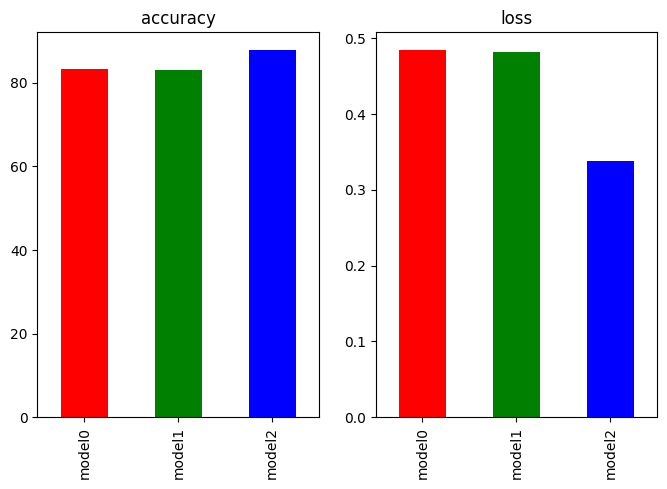

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
colors = ['red', 'green', 'blue']
compare_results['accuracy'].plot(kind = 'bar', color = colors)
plt.title('accuracy')
plt.subplot(1,2,2)
compare_results['loss'].plot(kind = 'bar', color = colors)
plt.title('loss')

# **plot the predicted images**

In [ ]:
# torch.manual_seed(42)
total_images = len(test_dataset)
total_images

10000

In [ ]:
indexes = torch.randperm(total_images)[:9]
indexes

tensor([2294, 9837, 7198, 5498, 8286, 9069, 5536, 4175, 5437])

In [ ]:
len(test_dataset[1])

2

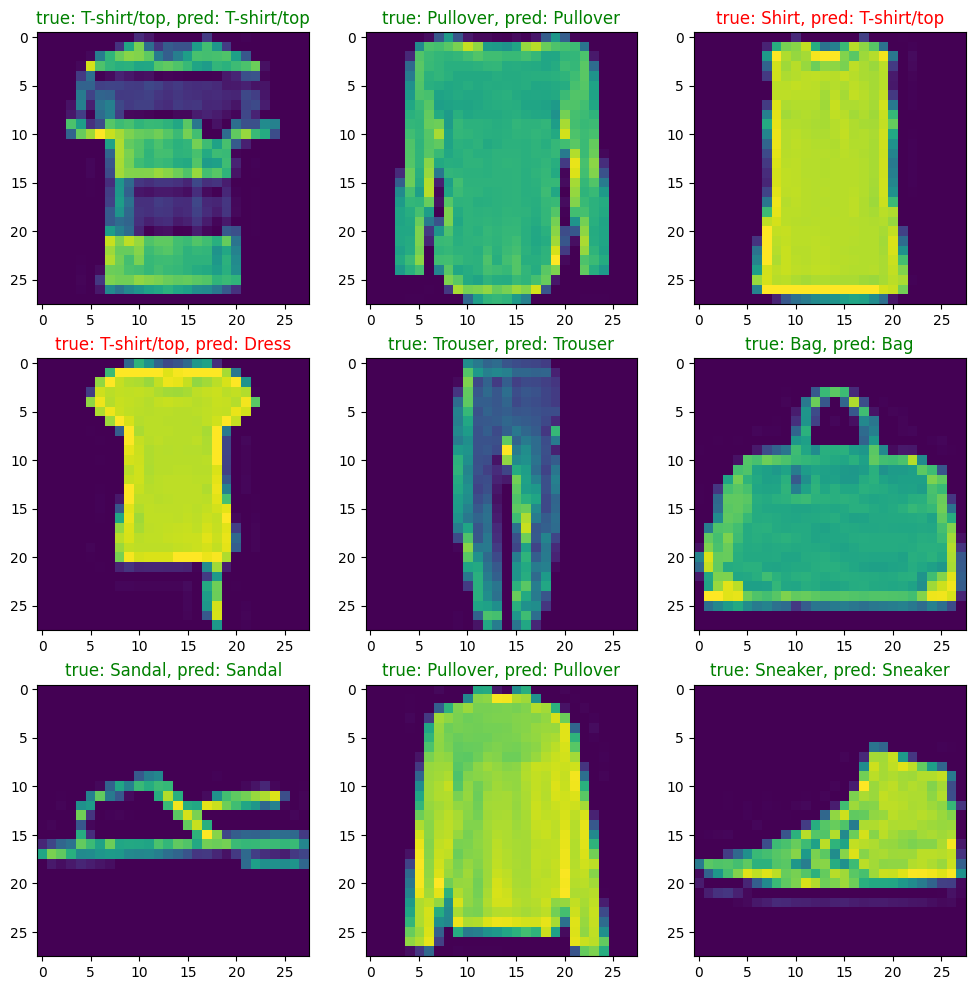

In [ ]:
indexes = torch.randperm(total_images)[:9]
indexes
plt.figure(figsize= (12,12))
for i in range (len(indexes)):
  model2.eval()
  with torch.inference_mode():
    image, true_label = test_dataset[indexes[i]]
    y_logits = model2(image.unsqueeze(dim = 0))
  plt.subplot(3,3,i+1)
  plt.imshow(image.squeeze())
  y_pred = y_logits.argmax(dim = 1)
  if true_label == y_pred.item():
    c = 'green'
  else:
    c = 'red'
  plt.title(f'true: {classes[true_label]}, pred: {classes[y_pred]}', color = c)


In [ ]:
model2.eval()
y_preds = []
y_true = []
with torch.inference_mode():
  for image, true_label in test_dataset:
    y_logits = model2(image.unsqueeze(dim = 1))
    y_predict = y_logits.argmax(dim = 1)
    y_preds.append(y_predict)
    y_true.append(true_label)



In [ ]:
y_preds[0]

tensor([9])

In [ ]:
from sklearn.metrics import confusion_matrix as cm


In [ ]:
mat = cm(y_true, y_preds)

<Axes: >

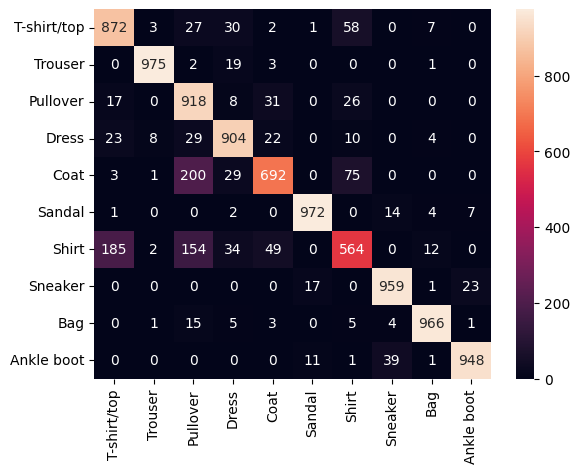

In [ ]:
import seaborn as sns
sns.heatmap(mat, xticklabels= classes,fmt = 'd', yticklabels= classes, annot= True)